In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.utils import to_categorical
import tensorflow as tf
from keras.layers import Add 

from keras.layers import Reshape

from keras import backend as K
from keras import regularizers, optimizers

Using TensorFlow backend.


In [2]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
import re
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub
from tqdm import tqdm
import cv2

In [3]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint

In [4]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [5]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [7]:
file_root = 'C:/Users/PRADHUMN MUDGAL/Downloads/AI_Assgn2/Melanoma'
melanoma_images = []
for img in tqdm(os.listdir(file_root)):
    path = os.path.join(file_root,img)
    img = cv2.imread(path)
    img = cv2.resize(img, (256,256))
    melanoma_images.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 374/374 [01:19<00:00,  4.72it/s]


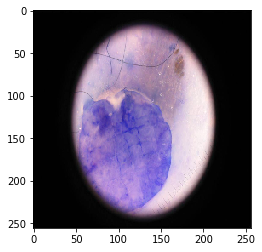

In [8]:
plt.imshow(melanoma_images[1])

In [9]:
file_root = 'C:/Users/PRADHUMN MUDGAL/Downloads/AI_Assgn2/gt'
ground_melanoma_images = []
for img in tqdm(os.listdir(file_root)):
    path = os.path.join(file_root,img)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256,256))
    ground_melanoma_images.append(img)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:19<00:00, 25.02it/s]


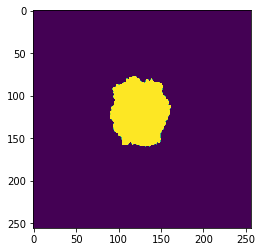

In [10]:
plt.imshow(ground_melanoma_images[1])

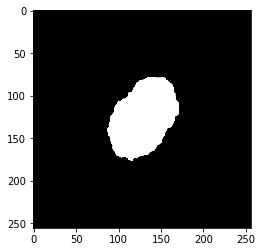

In [11]:
plt.imshow(ground_melanoma_images[6], cmap = "gray")

In [12]:
np.unique(ground_melanoma_images[6])

array([  0,  44,  47,  56,  86,  92,  94,  96,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 121, 122, 123, 124, 125, 127, 130, 137,
       138, 148, 152, 156, 159, 162, 164, 166, 172, 174, 176, 177, 186,
       190, 194, 196, 198, 200, 206, 207, 208, 210, 212, 213, 215, 216,
       219, 220, 222, 223, 225, 226, 227, 228, 230, 231, 232, 233, 234,
       236, 237, 255], dtype=uint8)

In [13]:
ground_melanoma_images[6].shape

(256, 256)

In [14]:
ret,thresh_img = cv2.threshold(ground_melanoma_images[6],127,255,cv2.THRESH_BINARY)

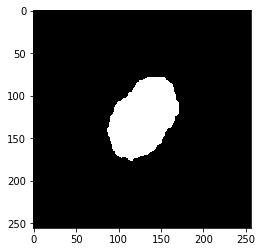

In [15]:
plt.imshow(thresh_img,cmap = "gray")

In [17]:
file_root = 'C:/Users/PRADHUMN MUDGAL/Downloads/AI_Assgn2/gt'
ground_melanoma_images = []
for img in tqdm(os.listdir(file_root)):
    path = os.path.join(file_root,img)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256,256))
    ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ground_melanoma_images.append(img)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:56<00:00, 35.59it/s]


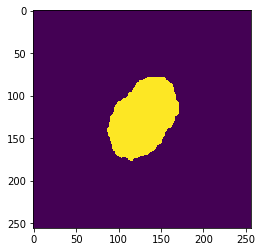

In [18]:
plt.imshow(ground_melanoma_images[6])

In [19]:
image=ground_melanoma_images[0]

In [20]:
image.shape

(256, 256)

In [21]:
np.unique(image)

array([  0, 255], dtype=uint8)

In [22]:
gt = np.array(ground_melanoma_images)

In [23]:
gt.shape

(2000, 256, 256)

In [24]:
np.unique(gt)

array([  0, 255], dtype=uint8)

In [25]:
gt=gt/255

In [26]:
np.unique(gt)

array([0., 1.])

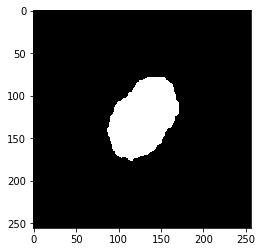

In [27]:
plt.imshow(gt[6],cmap = "gray")

In [29]:
file_root = 'C:/Users/PRADHUMN MUDGAL/Downloads/AI_Assgn2/others'
other_images = []
for img in tqdm(os.listdir(file_root)):
    path = os.path.join(file_root,img)
    img = cv2.imread(path)
    img = cv2.resize(img, (256,256))
    other_images.append(img)

100%|██████████████████████████████████████████████████████████████████████████████| 1626/1626 [06:35<00:00,  4.11it/s]


In [30]:
gt.shape

(2000, 256, 256)

In [31]:
total_image=[]
for i in tqdm(melanoma_images):
    total_image.append(i)

100%|█████████████████████████████████████████████████████████████████████████████| 374/374 [00:00<00:00, 93456.64it/s]


In [32]:
for i in tqdm(other_images):
    total_image.append(i)

100%|███████████████████████████████████████████████████████████████████████████| 1626/1626 [00:00<00:00, 33159.46it/s]


In [33]:
total_images = np.array(total_image)

In [34]:
total_images.shape

(2000, 256, 256, 3)

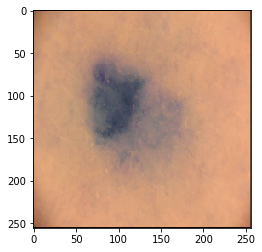

In [35]:
plt.imshow(total_images[10],cmap='gray')

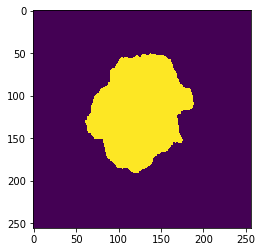

In [36]:
plt.imshow(gt[10])

In [37]:
total_images.shape

(2000, 256, 256, 3)

In [38]:
gt.shape

(2000, 256, 256)

In [39]:
np.save('C:/Users/PRADHUMN MUDGAL/Downloads/AI_Assgn2/gt',gt)

In [40]:
np.save('C:/Users/PRADHUMN MUDGAL/Downloads/AI_Assgn2/total_images',total_images)